In [1]:
#hide
from fastbook import *
from fastai.vision.widgets import *

C:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\fastbook\__init__.py:19: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
path = Path()
learn_inf = load_learner(path/"export.pkl")
learn_inf.predict("images/grizzly/00000001.jpg")

('grizzly', tensor(1), tensor([1.1546e-04, 9.9988e-01, 2.5044e-07]))

In [3]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

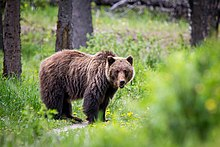

In [4]:
btn_upload = SimpleNamespace(data = ["images/grizzly/00000001.jpg"])

img = PILImage.create(btn_upload.data[-1])
img

In [5]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128, 128))
out_pl

Output()

In [6]:
pred, pred_idx, probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}"
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9999')

In [7]:
btn_run = widgets.Button(description="Classify")
btn_run

Button(description='Classify', style=ButtonStyle())

In [8]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128, 128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}"

btn_run.on_click(on_click_classify)

In [9]:
# Complete the GUI

btn_upload = widgets.FileUpload()
VBox([widgets.Label("Select your bear!"), 
    btn_upload,
    btn_run,
    out_pl,
    lbl_pred
])